In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Notes when answering the rest of the exam
This second part is worth 12 values in 20. 
1. It has 4 plots, very similar to what we saw in classes, 1 question with storytelling, dedicated points for extra information that increases comprehension. 
1. We expect that you take 1h30 to complete this part. So, manage your time accordingly.

1. We are giving you a generic analysis task over a dataset.  
It has an objective, and we ask you to do 4 plots that support that objective.  
2. After the plots, we ask you to write what could be the titles of the slides if you were going to present your work to a client -- This question is worth 1/20 of your grade. If you feel that you cannot finish your plots in time, **at least finish this question!**  you do not need the full set of plots to complete this last task!
3. We will guide the answers for those that need guidance. But you are free to jump to the solution - the grade is the same! Just ensure the final plot/representation is what we asked.
4. In classes, we saw that sometimes, just plotting the data was not enough. We had to add text to add extra information, or we added some lines in the plots that showed relevant points. This information helps the reader to better understand what is going on. However, it can make it more cluttered. **We will ask for the extra info. We will leave it up to you to decide what to add**. Just state at the end of each question what you added and why. This extra info is worth **2/20**. I recommend that you first finish the exam and only then you add this info.
5. It is prohibited to copy from your colleagues and use any social network app - if we suspect plagiarism, we will use dedicated programs to check, we will escalate to the pedagogical council and it may result in a 0 in the Data Divisualization course.  
6. Please, to avoid a mismatch between your expectations and the code we will review, **before submission: restart the kernel and run the whole notebook.**
7. Ensure that you have your submission ok before exiting the room! - e.g., call one of us invigilators to check if the quiz is properly submitted, as well as the notebook. 

Grade summary
- Multiple choice: 8/20
- plots - 9/20
- Storytelling: 1/20
- Extra information in plots: 2/20


# Task
We are doing a project for a client that wants to buy a house in a given market in the US. That market is still unfamiliar to you.   
Our objective is to choose the best house for your client to buy - or at least to define its main characteristics.  
- Note that he wants to buy a house at the market median value, in a regular neighborhood, and sell it after 5 years. 

We have a dataset with general data concerning: lot size, living area size, overall condition, year of construction, etc. File data_description.txt explains the data details. The dataset is in housing_market.csv.

Working hypotheses:  
1 - Neighborhood, area, age, amenities, and overall house condition are the main drivers for house prices  
2 - If we sell the house after five years, we will not lose money.

# 0 - Preparation

In [2]:
# read the dataset

In [3]:
df = pd.read_csv("housing_market.csv")

In [4]:
df.head(4)

,LotArea,LivingArea,NumberBedroom,TotalRooms,Neighborhood,YearBuilt,YearRemodAdd,YrSold,MoSold,KitchenQual,Condition1,OverallCond,SalePrice
0,8450,1710,3,8,CollgCr,2003,2003,2008,2,Gd,Norm,5,208500
1,9600,1262,3,6,Veenker,1976,1976,2007,5,TA,Feedr,8,181500
2,11250,1786,3,6,CollgCr,2001,2002,2008,9,Gd,Norm,5,223500
3,9550,1717,3,7,Crawfor,1915,1970,2006,2,Gd,Norm,5,140000


## 1 - The main driver behind the prices should be the size of real estate we are aquiring. 
We start by checking if the price per square foot is constant. I.e., we normalize the value of the sale price by the lot area and check if this normalized variable is constant for most sales.  

### Data preparation

In [5]:
# Add a new column with the name "norm_price_lot" with the sale price divided by the square foot of the real estate lot
# the sale price is the columns SalePrice and the lot area is the column LotArea
df["norm_price_lot"] = df["SalePrice"] / df["LotArea"]

### Check the overall price distribution after normalization
Use an ordered list of normalized values, where the x-axis represents the rank of each house sold according to an ordering by the normalized price. The y-axis represents the normalized price  
- This representation has a direct map to percentiles and medians.     
- The end result should be something like the figure below.    

<img src= "ordered_plot.png">

In [6]:
df.reset_index(inplace=True, drop=True)

In [7]:
df

,LotArea,LivingArea,NumberBedroom,TotalRooms,Neighborhood,YearBuilt,YearRemodAdd,YrSold,MoSold,KitchenQual,Condition1,OverallCond,SalePrice,norm_price_lot
0,8450,1710,3,8,CollgCr,2003,2003,2008,2,Gd,Norm,5,208500,24.674556
1,9600,1262,3,6,Veenker,1976,1976,2007,5,TA,Feedr,8,181500,18.906250
2,11250,1786,3,6,CollgCr,2001,2002,2008,9,Gd,Norm,5,223500,19.866667
3,9550,1717,3,7,Crawfor,1915,1970,2006,2,Gd,Norm,5,140000,14.659686
4,14260,2198,4,9,NoRidge,2000,2000,2008,12,Gd,Norm,5,250000,17.531557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1647,3,7,Gilbert,1999,2000,2007,8,TA,Norm,5,175000,22.104332
1456,13175,2073,3,7,NWAmes,1978,1988,2010,2,TA,Norm,6,210000,15.939279
1457,9042,2340,4,9,Crawfor,1941,2006,2010,5,Gd,Norm,9,266500,29.473568
1458,9717,1078,2,5,NAmes,1950,1996,2010,4,Gd,Norm,6,142125,14.626428


In [8]:
# Data preparation: we first need to order the dataset by norm_price_lot!
df.sort_values("norm_price_lot", inplace = True, ascending = False)
# do not forget that you need to reset the index using reset_index
df.reset_index(inplace=True, drop=True)
# if you do not order, when you plot your data it will not show as ordered
# IMPORTANT - always use the drop=True option in the reset_index method
# We have left here this example, but please note that you will have to repeat this 



In [9]:
df.sort_values("norm_price_lot", inplace = True, ascending = True)
df.reset_index(inplace=True, drop=True)
df2 = df.groupby(["OverallCond","norm_price_lot"])["OverallCond"].mean()
df2.reset_index(inplace=True, drop=True)

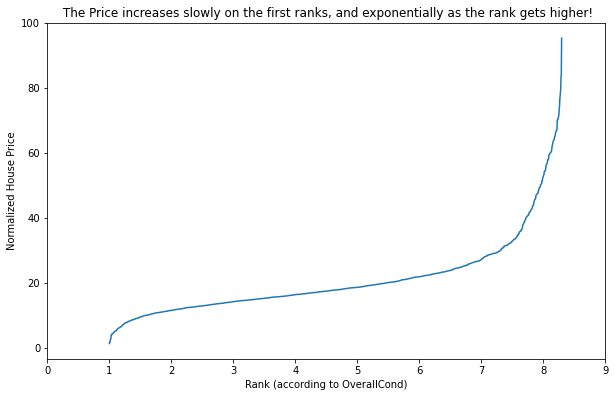

In [10]:
# initialize a figure with width 10 and height 6.18
fig, sp = plt.subplots(figsize=(10,10*0.618))
labels=[0,1,2,3,4,5,6,7,8,9]
# plot the normalized, ordered price per square foot
df["norm_price_lot"].plot(x="OverallCond")
# add labels and title
plt.xlabel("Rank (according to OverallCond)")
plt.ylabel("Normalized House Price")
plt.title(" The Price increases slowly on the first ranks, and exponentially as the rank gets higher!");
ticks_pos = plt.xticks()
plt.xticks(ticks=ticks_pos[0], labels=labels);

### Add relevant information/annotations (these are suggestions)
Examples of functions that may help you:
- plt.text(x,y,"text")  

To provide more insights, we may wish to highlight some points in the plot, as we did in class - when we first saw this representation. You may find the following function useful:
- df[["col_name"]].describe() provides you with the min, max, mean, median,... 
of the column "col_name" 

#### Note that these are suggestions. 
-- We will leave it up to you to decide what to add  
-- Adding **one extra meaningful bit** of info will get you the full credit.   
-- I advise you to first finish the rest of the exam and then come back here to finish this part.

## 2 - The second main driver should be the condition of the real estate
Use violin plots to check the distribution of prices with respect to the overall condition, which is represented by the variable OverallCond.   
- The expected result is something similar to the figure below:  

<img src="violin_plot.png" width=400>

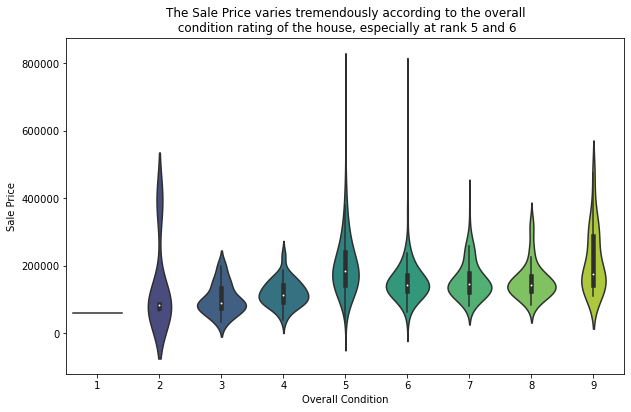

In [11]:
# initialize a figure of size 10, 6.18
fig, sp = plt.subplots(figsize=(10,10*0.618))
# plot norm_price_lot with respect to OverallCond using a violin plot
sns.violinplot(x="OverallCond", y="SalePrice",
                    data=df, palette="viridis", bw=0.5, ax=sp);
# add title and labels
plt.ylabel("Sale Price")
plt.xlabel("Overall Condition")
plt.title("The Sale Price varies tremendously according to the overall\n condition rating of the house, especially at rank 5 and 6");

In [12]:
df.loc[df["OverallCond"] == 1]

,LotArea,LivingArea,NumberBedroom,TotalRooms,Neighborhood,YearBuilt,YearRemodAdd,YrSold,MoSold,KitchenQual,Condition1,OverallCond,SalePrice,norm_price_lot
29,10020,904,1,4,Edwards,1922,1950,2009,3,Fa,Norm,1,61000,6.087824


## There is only 1 house with a ranking of 1. That is why our violin plot is flat.
## There are a lot of houses both up and down of Overall Condition 5. Less dispersion as well.

### Add relevant information/annotations
Things to consider:  
- those looking at the plot do not know what the overall condition means without looking at the data dictionary   
- knowing the size of each category may give extra insights

#### Note that these are suggestions. 
-- We will leave it up to you to decide what to add  
-- Adding **one extra meaningful bit** of info will get you the full credit.   
-- I advice you to first finish the rest of the exam, and then come back here to finish this part.

## 3 - Finally, the neighborhood is really important as a price driver
We want to see the average price per square foot in different neighborhoods.  
Use a bar plot with mean to represent the value per neighborhood.
The following figure shows an example of the representation that we want to see:  
<img src="bar_mean_age.png" width=400>

### Data preparation
We need a dataframe with the name of the neighborhoods associated with the mean value of the price in that neighborhood. There are different ways of computing this.  
1. pivot table
2. groupby

In the following, we guide you through both examples. **Choose the one you are more comfortable with.**   
- Delete the one you do not use to avoid mistakes

In [19]:
## OPTION 2 -- Groupby!
# compute the mean per Neighborhood using a groupby and mean as aggregation function
df2 = df.groupby("Neighborhood")["norm_price_lot"].mean()
# do not forget to order by the mean b

In [20]:
df2 = df2.sort_values()

In [21]:
df2

Neighborhood
IDOTRR     13.179700
ClearCr    13.780805
Sawyer     13.966735
NAmes      15.086940
Edwards    15.475815
Mitchel    16.430881
NWAmes     16.505557
OldTown    17.036698
BrkSide    17.500370
Veenker    18.081011
Timber     18.386003
Gilbert    18.575884
SWISU      18.630789
SawyerW    19.014902
Crawfor    21.043650
CollgCr    21.393421
NoRidge    25.668164
NridgHt    31.426916
Somerst    35.461897
StoneBr    36.074463
MeadowV    45.394765
NPkVill    49.577688
Blmngtn    57.643934
BrDale     58.323157
Blueste    86.410256
Name: norm_price_lot, dtype: float64

### Bar plot

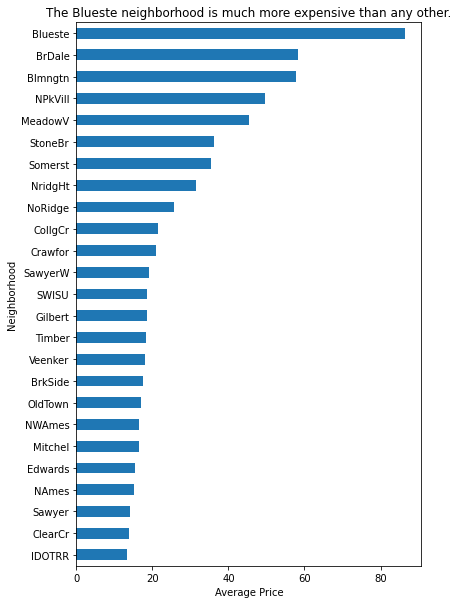

In [15]:
#initialize figure with dimensions 6.18, 10
fig, ax = plt.subplots(figsize=(6.18, 10))
# plot the mean as bars  
df2.plot(kind="barh")

# add labels and title
plt.ylabel("Neighborhood")
plt.xlabel("Average Price")
plt.title("The Blueste neighborhood is much more expensive than any other.");

### Add relevant information/annotations
Things to consider:
- As we saw in class, if the list is long, it may be difficult to associate the size of the bar with a specific number
- Lines also help 

#### Note that these are suggestions. 
-- We will leave it up to you to decide what to add  
-- Adding **one extra meaningful bit** of info will get you the full credit.   
-- I advise you to first finish the rest of the exam and then come back here to finish this part.

# 4 - At last, let us check how prices change with the age of the building
We want to plot a time series, where the x-axis is the age of the building and the y is the price per square foot as computed above. We want to see an estimation of the standard deviation as well.  
The overall result should be something similar to the plot below:  
<img src = "timeseries.png" width=300>


### Data preparation

In [16]:
# compute the age of the building by subtracting the construction year (YrSold) to the sale year (YearBuilt)
# add the result to a new column "age"
df["age"] = df["YrSold"]-df["YearBuilt"]

### Line plot

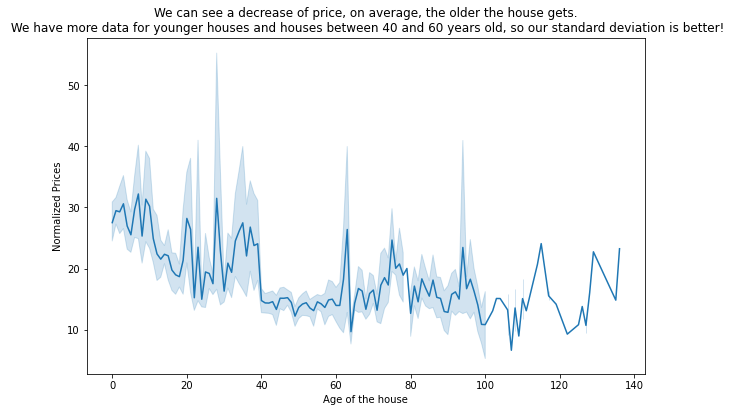

In [17]:
#initialize figure with size 10, 6.18
fig, ax = plt.subplots(figsize=(10, 6.18))
#add line with std deviation
lp = sns.lineplot(data = df, 
                     x = "age", 
                     y = "norm_price_lot",
                     ax=ax);
#add title and labels
plt.ylabel("Normalized Prices")
plt.xlabel("Age of the house")
plt.title("We can see a decrease of price, on average, the older the house gets.\n We have more data for younger houses and houses between 40 and 60 years old, so our standard deviation is better!");

### Add relevant information/annotations
Things to consider:
- you may want to highlight a part of the time series that might be relevant for the client (use add_patch and plt.Rectangle as we saw in classes)
- you may wish to highlight a specific x value, or max/min y-value.

#### Note that these are suggestions. 
- We will leave it up to you to decide what to add  
- Adding **one extra meaningful bit** of info will get you the full credit.   
- I advise you to first finish the rest of the exam and then come back here to finish this part.

# You will now present your results to your client.
Note that he wants to buy a house at the market median value, in a regular neighborhood, and sell it after 5 years. 

You have 3 slides to present. What should be the titles? 
- Write your answers using the markdown below.
- Remember the pattern for storytelling - your story may go beyond the plots we just saw. Just follow the pattern.
- 1/20

1. The client wants to buy a house at the median price... He should look at the neighborhoods like "Noridge" or "Bridgetown"!
1. Buy a house with age 40! As the price does not decrease a lot over the next five years.
1. 